# [Title]

## 1. Introduction

### 1.1 Literature review of the compound (<500 words)

### 1.2 Literature review of the cell factory (<500 words)

## 2. Problem definition (<300 words)

## 3. *If Project category I:* Reconstruction of a new GSM for your cell factory host of interest (<1500 words)

or

## 3. *If Project category II:* Selection and assessment of existing GSM (<500 words)

In [9]:
name = []
ID = []
fatty_acids = [name, ID]

for metabolite in model.metabolites.query('acid', 'name'):
    name.append(metabolite.name)
    
for acid in name:
    for metabolite in model.metabolites:
        if metabolite.name == acid:
            ID.append(metabolite.id)

In [48]:
%%time

from cobra import Reaction, Metabolite
from cameo.strain_design.heuristic.evolutionary_based import OptGene
from cameo.strain_design.deterministic.linear_programming import OptKnock

# Let's add exchange reactions for all of the fatty acids

with model:
    linoleic_acid_c_exchange = Reaction('EX_linoleic_c')
    linoleic_acid_c_exchange.add_metabolites({model.metabolites.lnlc_c: -1})
    model.add_reaction(linoleic_acid_c_exchange)

#    optgene = OptGene(model)
#    result = optgene.run(target=model.reactions.EX_linoleic_c, 
#                         biomass=model.reactions.Biomass_Chlamy_hetero,
#                         substrate=model.metabolites.glc_B_c,
#                         max_evaluations=200, population_size=200, max_knockouts=5,
#                         plot=False, growth_coupled=True)
    
    
    optknock = OptKnock(model, fraction_of_optimum=0.1)
    result = optknock.run(max_knockouts=1, target="EX_lac_D_e", biomass="Biomass_Chlamy_hetero")
    
    
    # It seems like Exchange reactions does not work properly in the optknock. Ex_lac_D_e is already defined in the model, but it does not run (Infeasible: None (infeasible)). If a proper reaction (which really
    # consumes and creates compounds) is used, optknock seems to work


cobra/core/group.py:110 UserWarning: need to pass in a list


Infeasible: None (infeasible)

In [ ]:
for metabolite in model.metabolites.query('glucose', 'name'):
    name = metabolite
    print(name)
    print(metabolite.name, '\n')

In [ ]:
from cameo import api
api.design(product='linoleic_c')

## 4. Computer-Aided Cell Factory Engineering (<1500 words if Category II project; <500 words for Category I project)

# Model upload and general information

Firstly, the model given by the authors was loaded into the script, but it creates problems during the reading, due to formating of the data (conflicts with SBML definitions).

In [ ]:
from cobra.io import read_sbml_model
model = read_sbml_model('iCre1355_hetero.xml')

# Source: https://github.com/baliga-lab/Chlamy_model_iCre1355.git

Therefore, in order to avoid constant warning messages that slow down computation, after the model is read for the first time, a new model is written with the correct format

In [ ]:
from cobra.io import write_sbml_model
write_sbml_model(model, 'iCre1355_hetero_V2.xml')
model = read_sbml_model('iCre1355_hetero_V2.xml')

Let´s now take a look into the model. Let´s begin by a quick look at the metabolites and the reactions:

In [49]:
model.metabolites

[<Metabolite 10fthf_c at 0x7f2d8210d208>,
 <Metabolite 10fthf_h at 0x7f2d8210d1d0>,
 <Metabolite 10fthf_m at 0x7f2d8210d2b0>,
 <Metabolite 10fthf_x at 0x7f2d8210d240>,
 <Metabolite 10fthfglu_L_c at 0x7f2d8210d2e8>,
 <Metabolite 10fthfglu_L_m at 0x7f2d8210d358>,
 <Metabolite 12dgr160_h at 0x7f2d8210d3c8>,
 <Metabolite 12dgr16018111Z_c at 0x7f2d8210d438>,
 <Metabolite 12dgr1601819Z_c at 0x7f2d8210d4a8>,
 <Metabolite 12dgr1601819Z_h at 0x7f2d8210d518>,
 <Metabolite 12dgr1801819Z_c at 0x7f2d8210d588>,
 <Metabolite 12dgr1801819Z_h at 0x7f2d8210d5f8>,
 <Metabolite 12dgr18111Z160_c at 0x7f2d8210d668>,
 <Metabolite 12dgr18111Z160_h at 0x7f2d8210d6d8>,
 <Metabolite 12dgr18111Z18111Z_c at 0x7f2d8210d748>,
 <Metabolite 12dgr18111Z1819Z_c at 0x7f2d8210d7b8>,
 <Metabolite 12dgr18111Z1819Z_h at 0x7f2d8210d828>,
 <Metabolite 12dgr1819Z160_c at 0x7f2d8210d898>,
 <Metabolite 12dgr1819Z160_h at 0x7f2d8210d908>,
 <Metabolite 12dgr1819Z1619Z_h at 0x7f2d8210d978>,
 <Metabolite 12dgr1819Z18111Z_c at 0x7f2d8

In [50]:
model.reactions

[<Reaction AAT at 0x7f2d81c25d68>,
 <Reaction ALATLm at 0x7f2d81bbb2e8>,
 <Reaction ASNTLm at 0x7f2d81bbb278>,
 <Reaction ASPO at 0x7f2d81bbb8d0>,
 <Reaction ASPOm at 0x7f2d81bbbe80>,
 <Reaction ASPTLm at 0x7f2d81bc6828>,
 <Reaction ASNTL at 0x7f2d81bbbe48>,
 <Reaction ASPTL at 0x7f2d81bc6c88>,
 <Reaction ALATL at 0x7f2d81bc67f0>,
 <Reaction ALATAH at 0x7f2d81bce208>,
 <Reaction ASNTAH at 0x7f2d81bce748>,
 <Reaction ASPTAH at 0x7f2d81bd5358>,
 <Reaction ASPATh at 0x7f2d81bd56d8>,
 <Reaction AGAT at 0x7f2d81bcef60>,
 <Reaction AGATx at 0x7f2d81bd5a58>,
 <Reaction ASPS at 0x7f2d81bd5e10>,
 <Reaction ASPSE at 0x7f2d81bd5a90>,
 <Reaction ACGAMPM at 0x7f2d81bdf240>,
 <Reaction G6PDA at 0x7f2d81bdfda0>,
 <Reaction UA4E at 0x7f2d81bdfe48>,
 <Reaction UDPACGLP at 0x7f2d81bdfd68>,
 <Reaction AAPT at 0x7f2d81bdfe10>,
 <Reaction ACGAM6PSi at 0x7f2d81be8908>,
 <Reaction GF6PTA at 0x7f2d81bee198>,
 <Reaction UAD at 0x7f2d81be88d0>,
 <Reaction UDPGALOR at 0x7f2d81be8d30>,
 <Reaction UMPU at 0x7f2d81

It is important that the model also contains gene anotations (i.e.: reactions are linked with the gen(es) that produce(s) the enzyme that catalyzes that reaction), in order to be able to run genetic optimization algorithms. We´ll check that too, by selecting a random reaction and ensuring that it has at least one gene linked to it:

`<<<<<<< HEAD`

In [2]:
from cobra.io import read_sbml_model
model = read_sbml_model('iCre1355_hetero_V2.xml')

In [5]:
model.genes

[<Gene Cre10.g451950.t1.2 OR Cre06.g284700.t1.2 at 0x7f2d81eb17f0>,
 <Gene Cre02.g143200.t1.1 OR at 0x7f2d81eb17b8>,
 <Gene Cre08.g368900.t1.2 OR Cre08.g368900.t2.1 at 0x7f2d81eb1828>,
 <Gene Cre03.g193800.t1.1 at 0x7f2d81eb1860>,
 <Gene Cre12.g528450.t1.2 at 0x7f2d81eb1898>,
 <Gene Cre09.g390986.t1.1 OR Cre06.g279150.t1.2 at 0x7f2d81eb18d0>,
 <Gene Cre06.g279150.t1.2 at 0x7f2d81eb1908>,
 <Gene Cre02.g143200.t1.1 at 0x7f2d81eb1940>,
 <Gene Cre17.g747297.t1.1 OR Cre02.g076600.t1.2 at 0x7f2d81eb1978>,
 <Gene Cre02.g097900.t1.2 OR Cre09.g387726.t1.1 OR Cre02.g147302.t1.1 at 0x7f2d81eb19b0>,
 <Gene Cre03.g182800.t1.1 OR Cre16.g650650.t1.1 OR Cre06.g294650.t1.2 at 0x7f2d81eb19e8>,
 <Gene Cre01.g004300.t1.2 OR Cre07.g321050.t1.1 at 0x7f2d81eb1a20>,
 <Gene Cre13.g576150.t1.1 OR at 0x7f2d81eb1a58>,
 <Gene Cre08.g385400.t1.2 OR Cre08.g385400.t2.1 at 0x7f2d81eb1a90>,
 <Gene Cre08.g379700.t1.2 at 0x7f2d81eb1ac8>,
 <Gene Cre01.g034400.t1.1 OR Cre08.g370650.t1.2 at 0x7f2d81eb1b00>,
 <Gene Cre09.g40

`=======`

In [52]:
model.genes

[<Gene Cre10.g451950.t1.2 OR Cre06.g284700.t1.2 at 0x7f2d81eb17f0>,
 <Gene Cre02.g143200.t1.1 OR at 0x7f2d81eb17b8>,
 <Gene Cre08.g368900.t1.2 OR Cre08.g368900.t2.1 at 0x7f2d81eb1828>,
 <Gene Cre03.g193800.t1.1 at 0x7f2d81eb1860>,
 <Gene Cre12.g528450.t1.2 at 0x7f2d81eb1898>,
 <Gene Cre09.g390986.t1.1 OR Cre06.g279150.t1.2 at 0x7f2d81eb18d0>,
 <Gene Cre06.g279150.t1.2 at 0x7f2d81eb1908>,
 <Gene Cre02.g143200.t1.1 at 0x7f2d81eb1940>,
 <Gene Cre17.g747297.t1.1 OR Cre02.g076600.t1.2 at 0x7f2d81eb1978>,
 <Gene Cre02.g097900.t1.2 OR Cre09.g387726.t1.1 OR Cre02.g147302.t1.1 at 0x7f2d81eb19b0>,
 <Gene Cre03.g182800.t1.1 OR Cre16.g650650.t1.1 OR Cre06.g294650.t1.2 at 0x7f2d81eb19e8>,
 <Gene Cre01.g004300.t1.2 OR Cre07.g321050.t1.1 at 0x7f2d81eb1a20>,
 <Gene Cre13.g576150.t1.1 OR at 0x7f2d81eb1a58>,
 <Gene Cre08.g385400.t1.2 OR Cre08.g385400.t2.1 at 0x7f2d81eb1a90>,
 <Gene Cre08.g379700.t1.2 at 0x7f2d81eb1ac8>,
 <Gene Cre01.g034400.t1.1 OR Cre08.g370650.t1.2 at 0x7f2d81eb1b00>,
 <Gene Cre09.g40

`>>>>>>> 478248ec169db000c30da1a3aac49500f3d7c932`

In [51]:
model.reactions.ALATLm

Reaction identifier,ALATLm
Name,alanine---tRNA ligase
Memory address,0x07f2d81bbb2e8
Stoichiometry,ala_L_m + atp_m + trnaala_m --> alatrna_m + amp_m + h_m + ppi_m L-Alanine + ATP + tRNA(Ala) --> L-Alanyl-tRNA(Ala) + AMP + H+ + Diphosphate
GPR,Cre02.g143200.t1.1 or Cre08.g368900.t1.2 or Cre08.g368900.t2.1
Lower bound,0.0
Upper bound,1000.0


Another useful information is what compartments are present in the host, the medium in which it is growing, and which products are actually released to the medium:

In [53]:
model.compartments

{'c': 'Cytosol',
 'h': 'Chloroplast',
 'm': 'Mitochondria',
 'x': 'Glyoxysome',
 'f': 'Flagellum',
 'e': 'Extra-organism',
 'n': 'Nucleus',
 'g': 'Golgi Apparatus',
 's': 'Eyespot',
 'u': 'Thylakoid Lumen',
 'i': 'Inner Mitochondrial membrane space'}

`<<<<<<< HEAD`

cobra/core/group.py:110 UserWarning: need to pass in a list



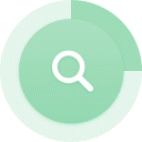

<IPython.core.display.Javascript object>

In [7]:
model.objective = model.reactions.Biomass_Chlamy_hetero
print(model.optimize().fluxes.Biomass_Chlamy_hetero)

`=======`

In [54]:
model.medium

{'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 0.5,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_ac_e': 2.0}

In [55]:
model.exchanges

[<Reaction EX_h_e at 0x7f2d819927b8>,
 <Reaction EX_h2o_e at 0x7f2d81992b70>,
 <Reaction EX_pi_e at 0x7f2d81992e80>,
 <Reaction EX_nh4_e at 0x7f2d81992d68>,
 <Reaction EX_no3_e at 0x7f2d81992ef0>,
 <Reaction EX_so4_e at 0x7f2d81992f28>,
 <Reaction EX_fe2_e at 0x7f2d81992780>,
 <Reaction EX_fe3_e at 0x7f2d81992710>,
 <Reaction EX_mg2_e at 0x7f2d81992cf8>,
 <Reaction EX_na1_e at 0x7f2d819a2208>,
 <Reaction EX_photonVis_e at 0x7f2d819a2278>,
 <Reaction EX_o2_e at 0x7f2d819a22b0>,
 <Reaction EX_co2_e at 0x7f2d819a2358>,
 <Reaction EX_hco3_e at 0x7f2d819a23c8>,
 <Reaction EX_ac_e at 0x7f2d819a24e0>,
 <Reaction EX_rib_D_e at 0x7f2d819a24a8>,
 <Reaction EX_no2_e at 0x7f2d819a2550>,
 <Reaction EX_his_L_e at 0x7f2d819a2518>,
 <Reaction EX_urea_e at 0x7f2d819a2668>,
 <Reaction EX_ad_e at 0x7f2d819a26a0>,
 <Reaction EX_gua_e at 0x7f2d819a2748>,
 <Reaction EX_ade_e at 0x7f2d819a2710>,
 <Reaction EX_alltt_e at 0x7f2d819a2780>,
 <Reaction EX_alltn_e at 0x7f2d819a28d0>,
 <Reaction EX_hxan_e at 0x7f2d

Finally, let´s run the model and see the growth rate under heterotrophic conditions:

In [66]:
model.objective = model.reactions.Biomass_Chlamy_hetero
print(model.optimize().fluxes.Biomass_Chlamy_hetero)

0.02998557548409622


`>>>>>>> 478248ec169db000c30da1a3aac49500f3d7c932`

# Data visualization

`<<<<<<< HEAD`

In order to have a better general idea of how the model works, a package like escher can be used. Escher helps visualizing the methabolic pathways, but it only contains models for yeast, E. coli and humans, not for all microorganisms.

#    optgene = OptGene(model)
#    result = optgene.run(target=model.reactions.EX_linoleic_c, 
#                         biomass=model.reactions.Biomass_Chlamy_hetero,
#                         substrate=model.metabolites.glc_B_c,
#                         max_evaluations=200, population_size=200, max_knockouts=5,
#                         plot=False, growth_coupled=True)
    
    optknock = OptKnock(model, fraction_of_optimum=0.1)
    result = optknock.run(max_knockouts=1, target="AAT", biomass="Biomass_Chlamy_hetero")


`=======`

In order to have a better general idea of how the model works, a package like escher can be used. Escher helps visualizing the methabolic pathways, but it only contains models for yeast, E. coli and humans, not for all microorganisms.

Nevertheless, a E. coli map can be loaded with Chlamydomomas reactions, so only the common pathways will be contain fluxes (reactions that are only present in Chlamydomomas will however not be shown in the model)

`>>>>>>> 478248ec169db000c30da1a3aac49500f3d7c932`

In [61]:
import escher
escher.list_available_maps()

[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

In [65]:
escher.Builder('iJO1366.Central metabolism',
               reaction_data=model.optimize().fluxes.to_dict()).display_in_notebook()

`<<<<<<< HEAD`

In [ ]:
Unfortunately, this approach was less useful than expected, as most of the reactions present in the model (´iJO1366.Central metabolism´ is one of the most complete E. coli models) were silent, meaning that they are not present in the Chlamydomomas model.

`=======`

Unfortunately, this approach was less useful than expected, as most of the reactions present in the model (´iJO1366.Central metabolism´ is one of the most complete E. coli models) were silent, meaning that they are not present in the Chlamydomomas model.

`>>>>>>> 478248ec169db000c30da1a3aac49500f3d7c932`

# Genetic optimization

Prior to any modification to the model, let´s look for the reactions that produce the desired compound:

In [6]:
model.reactions.AAT

Reaction identifier,AAT
Name,"alanine aminotransferase, mitochondrial"
Memory address,0x07fbf140cacf8
Stoichiometry,akg_m + ala_L_m <=> glu_L_m + pyr_m 2-Oxoglutarate + L-Alanine <=> L-Glutamate + Pyruvate
GPR,Cre10.g451950.t1.2 or Cre06.g284700.t1.2
Lower bound,-1000.0
Upper bound,1000.0


Now, let´s see what is the maximum production of (SELECTEDE PRODUCT) in the wild strain, and which growth is achieved with that production:

## 5. Discussion (<500 words)

## 6. Conclusion (<200 words)

## References

What has to be done:
    
    Create exchange reactions for the lipids (otherwise they would accumulate, breaking the assumption of steady state)
    
    Reduce biomass growth in order to allow carbon to be diverted into lipid production pathways (otherwise it would not be driven towards this pathways, as it would be a lost of  C for growth) and to simulate N shortage (even though that would trigger a lot of genome expression / silention, as that is a stres condition in which cells are struggling to keep alive)
    
    Set the objecive function to the sum of the exchange reactions of lipids (optimize the total sum)
    
    Use escher with the map of E.coli, but with the reactions and fluxes of C.reinhardtii (some reactions wont be present in escher, others present in escher will have no flux at all)

# OPTIMIZATION ALGORITHMS that we can apply to e.g. obtain more of compound X

- OptKnock: determines which are the reactions we have to knock out in order to optimize production of X
- OptStrain: determines which genes we have to insert to our model so that it produces more of X (but it was already being produced) OR start producing X from scratch 
- OptGene: determines, within a whole population (so taking into account evolutionary driving forces), which deletions should be made to improve production of X 
- OptReg: tells us which knock-outs, upregulatins or downregulations we have to make to improve production of X
- OptForce: tells us which (more than 1 modification) knock-outs, upregulatins or downregulations we have to make to improve production of X to a specific flux

In [8]:
model.metabolites.get_by_id('6mpur_c')

Metabolite identifier,6mpur_c
Name,6-Mercaptopurine
Memory address,0x07fbf14587390
Formula,C5H4N4S
Compartment,c
In 2 reaction(s),"6MPURt, 6MPURPRT"


In [9]:
model.reactions.get_by_id('6MPURPRT')

Reaction identifier,6MPURPRT
Name,6-mercaptopurine phosphoribosyltransferase
Memory address,0x07fbf13e25e48
Stoichiometry,6mpur_c + prpp_c --> 6tins5mp_c + ppi_c 6-Mercaptopurine + 5-Phospho-alpha-D-ribose 1-diphosphate --> 6-Thioinosine-5'-monophosphate + Diphosphate
GPR,Cre17.g708100.t1.2 or Cre04.g217934.t1.1 or Cre08.g358900.t1.2
Lower bound,0.0
Upper bound,1000.0


In [10]:
model.reactions.get_by_id('6MPURt')

Reaction identifier,6MPURt
Name,"nucleobase transport, 6-mercaptopurine (extracellular)"
Memory address,0x07fbf1327f518
Stoichiometry,6mpur_e <=> 6mpur_c 6-Mercaptopurine <=> 6-Mercaptopurine
GPR,Cre10.g433200.t1.2 or Cre10.g442600.t1.2 or Cre10.g442600.t2.1 or Cre10.g442800.t1.1 or Cre06.g30...
Lower bound,-1000.0
Upper bound,1000.0


In [18]:
from cobra import Reaction, Metabolite
from cameo import OptStrain

ImportError: cannot import name 'OptStrain'

In [12]:
model.metabolites.query('palmit', 'name')

[<Metabolite 3hpalmACP_h at 0x7fbf145d9c88>,
 <Metabolite retpalm_s at 0x7fbf1440bbe0>,
 <Metabolite retpalm_11_cis_s at 0x7fbf1440bcc0>]

In [16]:
model.metabolites.hdca_c

Metabolite identifier,hdca_c
Name,Hexadecanoate (n-C16:0)
Memory address,0x07fbf14462240
Formula,C16H31O2
Compartment,c
In 14 reaction(s),"TAGAH1819Z1819Z160, CERAH, TAGAH1819Z18111Z160, FACOAE160, TAGAH1801819Z160, TAGAH1601819Z160, FACOAL160, TAGAH18111Z1819Z160, PHYCERAH, FA160h, MAGAH160, DHCERAH, TAGAH16018111Z160, TAGAH18111Z181..."
